In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('diamonds_good.csv')
df

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


carat представляет собой вес алмаза в каратах, где 1 карат равен 200 миллиграммам. Это наиболее важный фактор при определении цены алмаза, так как вес напрямую влияет на размер и редкость камня. Более крупные алмазы встречаются реже и имеют нелинейное увеличение стоимости с ростом веса

Фичи cut (огранка), color (цвет) и clarity (чистота) представляют собой три из Четырёх C (4Cs) оценки качества алмазов по системе GIA

сut определяет качество огранки алмаза, которое влияет на его способность отражать и преломлять свет. Категории идут от Fair (посредственная) до Ideal (идеальная), где лучшая огранка максимально усиливает оптические свойства алмаза

color описывает степень бесцветности алмаза по шкале от D (полностью бесцветный, самый ценный) до J (заметный желтоватый или коричневатый оттенок). Чем ближе к D, тем выше ценность, так как совершенно бесцветные алмазы встречаются реже

clarity указывает на отсутствие внутренних дефектов (включений) и внешних дефектов (царапин, сколов). Шкала начинается с I1 (включения видны невооруженным глазом) до IF (внутренне безупречный). Более чистые алмазы ценятся выше, так как включения могут влиять на прочность и внешний вид

Фичи depth и table представляют собой пропорции алмаза. depth это отношение глубины алмаза к его среднему диаметру в процентах, влияющее на способность камня отражать свет. table это ширина верхней плоской грани (площадки) относительно диаметра алмаза. Идеальные пропорции (глубина 59-63%, площадка 53-58% для круглой огранки)

Фичи x, y, z представляют собой физические размеры алмаза в миллиметрах по трём осям: длина, ширина и глубина соответственно. Эти измерения используются для расчета объема и проверки пропорций камня

price это таргет, представляющий собой цену алмаза в долларах. Цена определяется сложным взаимодействием всех вышеперечисленных факторов, причем вес карат обычно имеет наибольшее влияние, за которым следуют цвет, чистота и огранка. Получаем задачу регрессии


In [ ]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price      float64
'x'        float64
'y'        float64
'z'        float64
dtype: object

Исправляем названия колонок с лишними кавычками, чтоб избежать ошибок в будущем

In [ ]:
df.columns = df.columns.str.replace("'", "")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


Проверяем пропущенные значения, тк они могут нарушить работу мл моделей

In [ ]:
print("Пропущенные значения:")
print(df.isna().sum())
print(f"\nВсего пропусков: {df.isna().sum().sum()}")

Пропущенные значения:
carat      498
cut          0
color        0
clarity      0
depth      990
table        0
price        0
x            0
y            5
z            0
dtype: int64

Всего пропусков: 1493


Анализ аномальных значений в размерах

In [ ]:
print("Строки с нулевыми значениями размеров:")
print(df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)])

print("\nЭкстремальные значения в размерах (y > 30):")
print(df[df['y'] > 30])

Строки с нулевыми значениями размеров:
       carat        cut color clarity  depth  table    price     x     y    z
2207    1.00    Premium     G     SI2   59.1   59.0   3142.0  6.55  6.48  0.0
2314    1.01    Premium     H      I1   58.1   59.0   3167.0  6.66  6.60  0.0
4791    1.10    Premium     G     SI2   63.0   59.0   3696.0  6.50  6.47  0.0
5471    1.01    Premium     F     SI2   59.2   58.0   3837.0  6.50  6.47  0.0
10167   1.50       Good     G      I1   64.0   61.0   4731.0  7.15  7.04  0.0
11182   1.07      Ideal     F     SI2   61.6   56.0   4954.0  0.00  6.62  0.0
11963   1.00  Very Good     H     VS2   63.3   53.0   5139.0  0.00  0.00  0.0
13601   1.15      Ideal     G     VS2   59.2   56.0   5564.0  6.88  6.83  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381.0  0.00  0.00  0.0
24394   2.18    Premium     H     SI2   59.4   61.0  12631.0  8.49  8.45  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800.0  0.00  0.00  0.0
26123   2.25    Premium  

Удаляем строки с нулевыми размерами

In [ ]:
df_clean = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)].copy()
df_clean = df_clean[df_clean['y'] < 30].copy()

print(f"Размер после очистки: {df_clean.shape}")
print(f"Удалено строк: {len(df) - len(df_clean)}")

Размер после очистки: (53913, 10)
Удалено строк: 27


Заполняем пропущенные значения. Для carat используем медиану по cut и color. Для depth используем медиану по cut. Для y используем общую медиану

In [ ]:
df_clean['y'] = df_clean['y'].fillna(df_clean['y'].median())
df_clean['carat'] = df_clean['carat'].fillna(
    df_clean.groupby(['cut', 'color'])['carat'].transform('median')
)
df_clean['depth'] = df_clean['depth'].fillna(
    df_clean.groupby('cut')['depth'].transform('median')
)

print("Пропуски после заполнения:")
print(df_clean.isna().sum().sum())

Пропуски после заполнения:
0


Создаем новые признаки

Добавим фичу объем (valume) как произведение размеров xyz, тк он д лучше описывает размер алмаза чем отдельные измерения. Больший объем при том же весе может указывать на менее плотный камень

Площадь поверхности surface_area Площадь поверхности может влиять на блеск алмаза. Большая площадь поверхности при том же объеме может означать лучшую огранку

тк цены алмазов распределены неравномерно то введем логарифмирование цены log(1 + price)

In [ ]:
df_clean['volume'] = df_clean['x'] * df_clean['y'] * df_clean['z']
print(f"  Средний объем {df_clean['volume'].mean():.2f} мм^3")
print(f"  Корреляция с price {df_clean['volume'].corr(df_clean['price']):.4f}")

df_clean['surface_area'] = 2 * (df_clean['x']*df_clean['y'] + 
                               df_clean['x']*df_clean['z'] + 
                               df_clean['y']*df_clean['z'])
print(f"  Средняя площадь: {df_clean['surface_area'].mean():.2f} мм^2")
print(f"  Корреляция с price: {df_clean['surface_area'].corr(df_clean['price']):.4f}")

df_clean['log_price'] = np.log1p(df_clean['price'])
print(f"  Skewness до: {df_clean['price'].skew():.3f}")
print(f"  Skewness после: {df_clean['log_price'].skew():.3f}")


  Средний объем 129.81 мм^3
  Корреляция с price 0.9227
  Средняя площадь: 152.43 мм^2
  Корреляция с price: 0.9101
  Skewness до: 1.618
  Skewness после: 0.116


Производим кодирование (что делали в первой лабораторной) по фичам, от которых зависит возрастание цены

In [ ]:
cut_order = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_order = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_order = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

df_clean['cut_encoded'] = df_clean['cut'].map(cut_order)
df_clean['color_encoded'] = df_clean['color'].map(color_order)
df_clean['clarity_encoded'] = df_clean['clarity'].map(clarity_order)

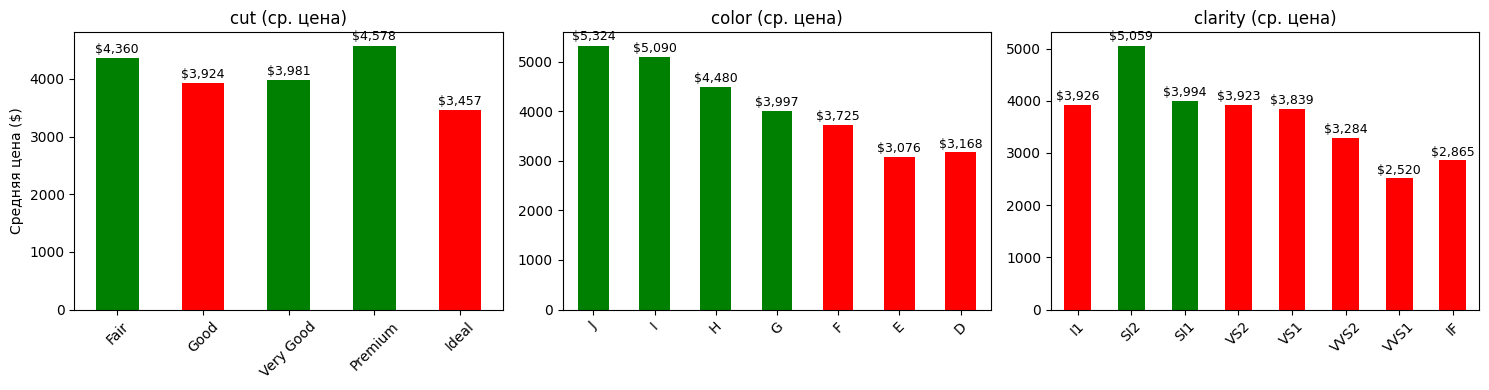

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

orders = [
    ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
    ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
    ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
]

categorical_cols = ['cut', 'color', 'clarity']

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    
    avg_price_by_cat = df_clean.groupby(col)['price'].mean().reindex(orders[i])
    
    mean_price = df_clean['price'].mean()
    colors = ['red' if val < mean_price else 'green' for val in avg_price_by_cat]
    
    avg_price_by_cat.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'{col} (ср. цена)')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)
    if i == 0: 
        ax.set_ylabel('Средняя цена ($)')
    
    for j, v in enumerate(avg_price_by_cat):
        ax.text(j, v + v*0.01, f'${v:,.0f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


получается что чистота (clarity) дает макимальный разброс по цене. у cut наименьший разброс из трех параметров
Разница в цене относительно цвета тоже, относительно, существенна

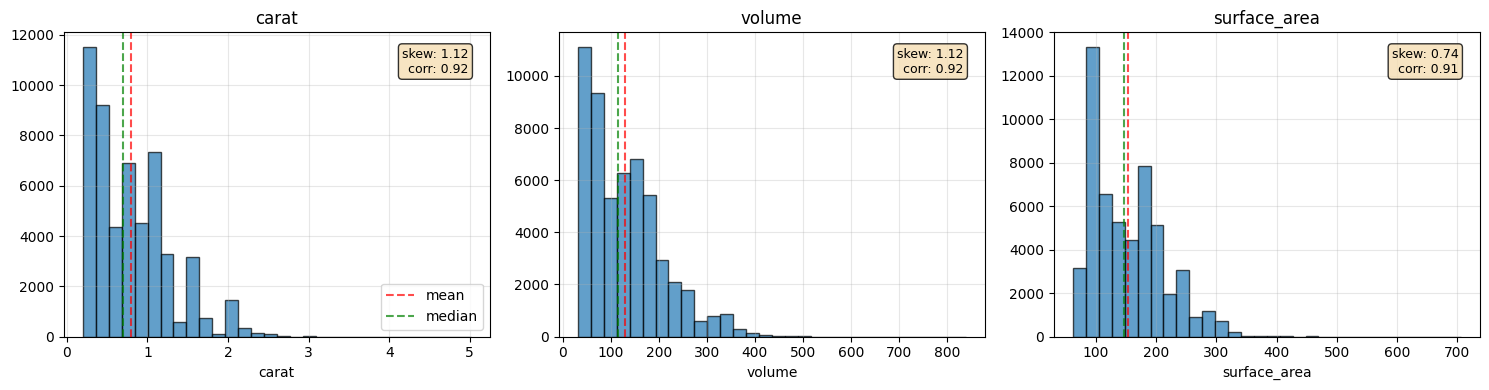

In [ ]:
key_features = ['carat', 'volume', 'surface_area']

fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 

for i, col in enumerate(key_features):
    ax = axes[i]
    
    df_clean[col].hist(bins=30, ax=ax, edgecolor='black', alpha=0.7)
    
    mean_val = df_clean[col].mean()
    median_val = df_clean[col].median()
    
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='mean')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label='median')
    
    ax.set_title(f'{col}', fontsize=12)
    ax.set_xlabel(col)
    ax.grid(True, alpha=0.3)
    
    skew_val = df_clean[col].skew()
    corr_val = df_clean[col].corr(df_clean["price"])
    stats_text = f'skew: {skew_val:.2f}\ncorr: {corr_val:.2f}'
    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, 
            fontsize=9, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    if i == 0:
        ax.legend()

plt.tight_layout()
plt.show()


все признаки имеют правостороннюю асимметрию, больше дешевых алмазов чем дорогих.
сильная мультиколлинеарность между carat, volume и surface_area. Для устранения проблемы в мл модели надо не забыть выбрать только один признак - carat, как наиболее интерпретируемый.

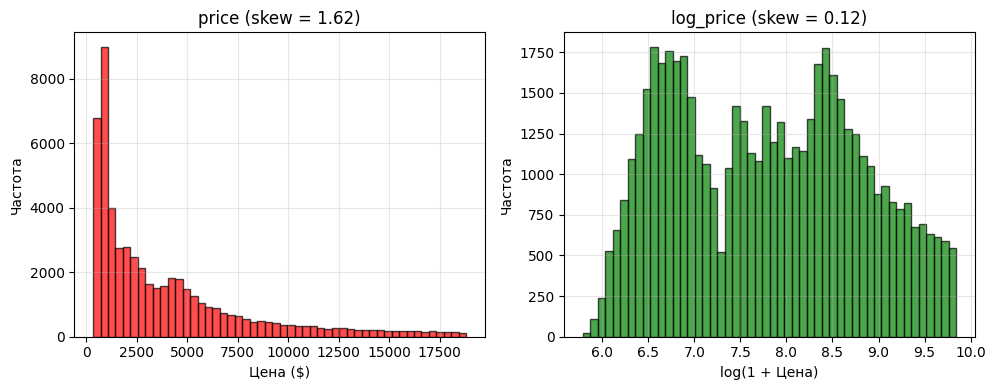

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.hist(df_clean['price'], bins=50, edgecolor='black', alpha=0.7, color='red')
ax1.set_title(f'price (skew = {df_clean["price"].skew():.2f})')
ax1.set_xlabel('Цена ($)')
ax1.set_ylabel('Частота')
ax1.grid(True, alpha=0.3)

ax2.hist(df_clean['log_price'], bins=50, edgecolor='black', alpha=0.7, color='green')
ax2.set_title(f'log_price (skew = {df_clean["log_price"].skew():.2f})')
ax2.set_xlabel('log(1 + Цена)')
ax2.set_ylabel('Частота')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

По гистограмме цены видно, что очень мало дорогих камне и очень много дешевых, поэтому и ввел логарифм цены, чтоб убрать этот хвост и сделать для всех камней равный вес для дальнейшего обучения

In [ ]:
stats_data = []
for col in key_features + ['log_price']:
    stats_data.append({
        'Признак': col,
        'Skew': df_clean[col].skew(),
        'Corr с price': df_clean[col].corr(df_clean['price']) if col != 'log_price' else 'N/A',
        'Mean': df_clean[col].mean()
    })

stats_df = pd.DataFrame(stats_data)
print(stats_df.to_string(index=False, float_format=lambda x: f'{x:.2f}' if isinstance(x, float) else str(x)))

     Признак  Skew Corr с price   Mean
       carat  1.12         0.92   0.80
      volume  1.12         0.92 129.81
surface_area  0.74         0.91 152.43
   log_price  0.12          N/A   7.79


ну и собственно за таргет берем логарифм цены, а карат и чистоту берем в качестве входного признака по предсказанию цены. Размеры получились скошенными...нужна нормализация

In [ ]:
features = ['carat', 'clarity_encoded']
target = 'log_price'

X = df_clean[features]
y = df_clean[target]
y_original = df_clean['price']

print(f"\nРазмерность данных:")
print(f"  X: {X.shape} ({X.shape[1]} признаков)")
print(f"  y: {y.shape} (log_price)")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, y_train_orig, y_test_orig = train_test_split(
    X, y, y_original, 
    test_size=0.2,        
    random_state=42,      
    shuffle=True          
)

print(f"\nРазделение данных:")
print(f"  Train: {X_train.shape[0]}") #samples (80%)
print(f"  Test:  {X_test.shape[0]} ") # samples (20%)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nМасштабирование признаков:")
print(f"  Среднее до масштабирования: {X_train.mean().values}")
print(f"  Среднее после: {X_train_scaled.mean(axis=0).round(2)}")


Размерность данных:
  X: (53913, 2) (2 признаков)
  y: (53913,) (log_price)

Разделение данных:
  Train: 43130
  Test:  10783 

Масштабирование признаков:
  Среднее до масштабирования: [0.79826652 3.05256202]
  Среднее после: [-0. -0.]


выбрали 2 основных признака 'carat', 'clarity_encoded' за таргет взяли логарифмированную цену из-за нормального распределения. разделили данные 80/20 на train/test с фиксированным random_state для воспроизводимости.

## ML MODELS

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

обучение на train данных и автоматизация оценки

In [ ]:
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test, y_test_orig):
    
    model.fit(X_train, y_train)
    
    y_pred_log = model.predict(X_test)
    
    y_pred = np.expm1(y_pred_log)  # exp(y) - 1
    
    r2 = r2_score(y_test_orig, y_pred)  # R^2 в долларах
    rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))  # RMSE в долларах
    mae = mean_absolute_error(y_test_orig, y_pred)  # MAE в долларах
    
    errors = np.abs(y_test_orig - y_pred)
    pct_500 = (errors < 500).mean() * 100  # ошибок < $500
    pct_1000 = (errors < 1000).mean() * 100  # ошибок < $1000
    
    return {
        'name': model_name,
        'model': model,
        'r2': r2,
        'rmse': rmse,
        'mae': mae,
        'pct_500': pct_500,
        'pct_1000': pct_1000,
        'predictions': y_pred,
        'errors': errors
    }

#### random forest

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=50,      # 50 деревьев
    max_depth=5,          # глубина дерева
    min_samples_split=10,   # мин. примеров для split
    random_state=42,       # для воспроизводимости
    n_jobs=-1              # использовать все ядра
)
rf_results = evaluate_model(rf_model, "Random Forest", 
                           X_train_scaled, X_test_scaled, 
                           y_train, y_test, y_test_orig)

print(f"   R^2: {rf_results['r2']:.4f}")
print(f"   RMSE: ${rf_results['rmse']:,.0f}")
print(f"   MAE: ${rf_results['mae']:,.0f}")
print(f"   Ошибка < $500: {rf_results['pct_500']:.1f}%")
print(f"   Ошибка < $1000: {rf_results['pct_1000']:.1f}%")


   R^2: 0.9108
   RMSE: $1,175
   MAE: $629
   Ошибка < $500: 68.4%
   Ошибка < $1000: 81.6%


Что получилось
модель объяснила 91 процент разброса цен, остальное скинула в шум
средняя ошибка $1,175
в среденм ошибается на 629 баксов
68.4% предсказаний имеют абсолютную ошибку менее $500 получается хороший уровень точности для дешевых камней, для камней менее 1к долларов 81процент

#### GRADIENT BOOSTING

In [ ]:
gb_model = GradientBoostingRegressor(
    n_estimators=50,      # 50 деревьев
    learning_rate=0.05,     # скорость обучения
    max_depth=3,           # глубина дерева
    random_state=42        # для воспроизводимости
)
gb_results = evaluate_model(gb_model, "Gradient Boosting",
                           X_train_scaled, X_test_scaled, 
                           y_train, y_test, y_test_orig)

print(f"   R^2: {gb_results['r2']:.4f}")
print(f"   RMSE: ${gb_results['rmse']:,.0f}")
print(f"   MAE: ${gb_results['mae']:,.0f}")
print(f"   Ошибка < $500: {gb_results['pct_500']:.1f}%")
print(f"   Ошибка < $1000: {gb_results['pct_1000']:.1f}%")

   R^2: 0.8643
   RMSE: $1,449
   MAE: $726
   Ошибка < $500: 68.1%
   Ошибка < $1000: 81.1%


In [ ]:
if rf_results['r2'] > gb_results['r2']:
    best_model = rf_results['model']
    best_results = rf_results
    best_predictions = rf_results['predictions']
    best_errors = rf_results['errors']
    print("Лучшая модель: Random Forest")
else:
    best_model = gb_results['model']
    best_results = gb_results
    best_predictions = gb_results['predictions']
    best_errors = gb_results['errors']
    print("Лучшая модель: Gradient Boosting")

print(f"  R^2: {best_results['r2']:.4f}")
print(f"  MAE: ${best_results['mae']:,.0f}")

Лучшая модель: Random Forest
  R^2: 0.9711
  MAE: $350


random forest показал лучший результат 0.9711 в сравнении с GradientBoosting 0.9483 (по метрике r^2). модель объясняет 97.11% дисперсии цены со средней ошибкой +-$350

теперь анализ важности параметров, хочу сравнить вклад по этим двум моделям

In [ ]:
print("Random Forest")

rf_importance = rf_model.feature_importances_
for feat, imp in zip(features, rf_importance):
    corr = df_clean[feat].corr(df_clean['price'])
    print(f"{feat:15} {imp*100:6.1f}%  (корр: {corr:+.3f})")
 
print("-" * 40)
print("Gradient Boosting")

gb_importance = gb_model.feature_importances_
for feat, imp in zip(features, gb_importance):
    corr = df_clean[feat].corr(df_clean['price'])
    print(f"{feat:15} {imp*100:6.1f}%  (корр: {corr:+.3f})")


Random Forest
carat             97.2%  (корр: +0.917)
clarity_encoded    2.8%  (корр: -0.147)
----------------------------------------
Gradient Boosting
carat             97.6%  (корр: +0.917)
clarity_encoded    2.4%  (корр: -0.147)


карат получился основным драйвером цены, что определяет базовую стоимость алмаза.
clarity получился избыточным признаком. Отрицательная корреляция получилась... Это всё датасет! С кодировкой вроде как все в порядке.